In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def convert(filename, delimiter=",", print_intermediate=True):
    """
    Returns a tuple with the dataframe and the column names
    """
    # Get dataframe and headers from csv
    df = pd.read_csv(filename, delimiter,header=0)
    header_list = list(df.columns)

    if print_intermediate:
        # Print what we got
        print("\nObtained a dataframe with the following fields:")
        print("\n", df.dtypes, "\n")
        print("\nDataframe description:")
        print("#"*100+"\n", df, "\n"+"#"*100+"\n")
        print("\nHeaders:")
        print("#"*100,"\n", header_list, "\n"+"#"*100+"\n")

    return (df, header_list)

FILENAME = "nyt_ts.csv"
intermediate = convert(FILENAME, ",", False)
election_df = intermediate[0]
headers = intermediate[1]

In [3]:
# Get minimum and maximum timestamps
timestamps = election_df.timestamp.unique()
timestamps.sort()
earliest = timestamps[0]
latest = timestamps[len(timestamps)-1]

print ("Tallying begins at {0} and goes on until {1}.".format(earliest, latest))


Tallying begins at 2020-11-03T14:16:25Z and goes on until 2020-11-09T04:50:49Z.


In [5]:
# Convert strings representing datetime objects to datetime objects

def clean_column(df, column_name, error_values=[999]):
    """
    error_values is a list to be removed from column df[column_name]
    returns a dataframe with just one column
    """
    column = list(df[column_name][~df[column_name].isin(error_values)])
    # Creating a new dataframe
    cleaned = pd.DataFrame({column_name: column})

    return cleaned


def getdatetimes(df, 
                 column_name, 
                 format = '%Y-%m-%d %H:%M:%S',
                 print_intermediate=True,
                 error_values=[""]):
    """
    Converts one column containing datetimes as strings to a dataframe containing datetimes
    """

    column = clean_column(df, column_name, error_values)
    dates = pd.to_datetime(column[column_name], format=format)

    if print_intermediate:
        print(column_name)
        print(dates)
        
    return dates

    
def splitdatetime(df, 
                  column_name,
                  format = '%Y-%m-%d %H:%M:%S',
                  print_intermediate=True,
                  error_values = [999]):
    """
    Add columns to dataframe with year, month, weekday, hour
    column_name: column containing datetime objects
    """
    df[column_name] = getdatetimes(df, column_name, format, print_intermediate, error_values)
    df['year']      = [d.year for d in df[column_name]]
    df['month']     = [d.month for d in df[column_name]]
    df['weekday']   = [datetime.date(d.year, d.month, d.day).isoweekday() for d in df[column_name]]
    df['hour']      = [d.hour for d in df[column_name]]

    if print_intermediate:
        print("\nProcessed datetimes:")
        print("#"*100+"\n", df, "\n"+"#"*100+"\n")

    return df

splitdatetime(election_df, 'timestamp', '%Y-%m-%d %H:%M:%S', False)

,Unnamed: 0,votes,eevp,eevp_source,timestamp,state,expected_votes,trump2016,votes2012,votes2016,vote_share_rep,vote_share_dem,vote_share_trd,year,month,weekday,hour
0,0,0,0,edison,2020-11-04 10:01:44+00:00,alaska,367000,163387,300495,318608,0.000,0.000,0,2020,11,3,10
1,1,113744,31,edison,2020-11-04 07:47:41+00:00,alaska,367000,163387,300495,318608,0.605,0.352,0,2020,11,3,7
2,2,132475,36,edison,2020-11-04 08:57:55+00:00,alaska,367000,163387,300495,318608,0.614,0.347,0,2020,11,3,8
3,3,172031,56,edison,2020-11-04 18:34:58+00:00,alaska,367000,163387,300495,318608,0.629,0.330,0,2020,11,3,18
4,4,0,0,edison,2020-11-04 10:02:44+00:00,alabama,2300000,1318255,2074338,2123372,0.000,0.000,0,2020,11,3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8406,8406,268852,93,edison,2020-11-04 08:29:35+00:00,wyoming,280000,174419,249061,255849,0.697,0.268,0,2020,11,3,8
8407,8407,271429,94,edison,2020-11-04 08:45:32+00:00,wyoming,280000,174419,249061,255849,0.698,0.267,0,2020,11,3,8
8408,8408,276343,95,edison,2020-11-04 08:50:19+00:00,wyoming,280000,174419,249061,255849,0.699,0.266,0,2020,11,3,8
8409,8409,276343,99,edison,2020-11-05 03:23:59+00:00,wyoming,280000,174419,249061,255849,0.699,0.266,0,2020,11,4,3


In [6]:
# Get state names
states = election_df.state.unique()
# print(states)

In [7]:
# Build queries to filter election_df by state
queries = [(s, ('state == \"{0}\"'.format(s))) for s in states]
# print (queries)

In [8]:
# Make queries
resultsByState = [(q[0], election_df.query(q[1])) for q in queries]
# print(resultsByState[0])

<ipython-input-12-93c1d489bef9>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(25,4))


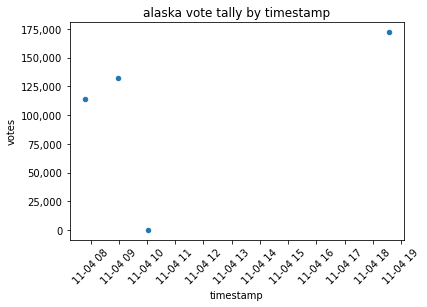

<Figure size 1800x288 with 0 Axes>

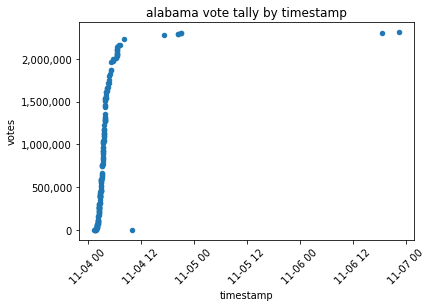

<Figure size 1800x288 with 0 Axes>

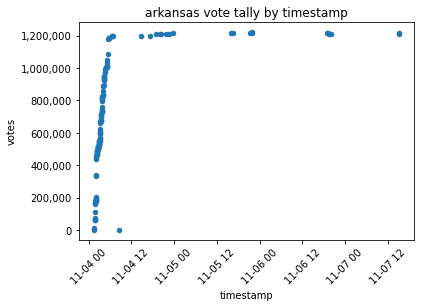

<Figure size 1800x288 with 0 Axes>

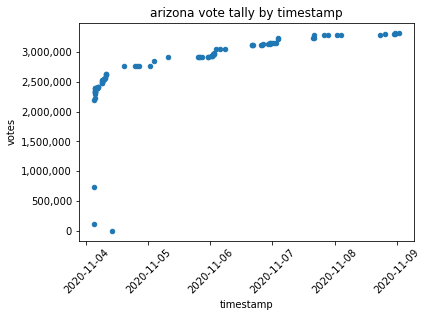

<Figure size 1800x288 with 0 Axes>

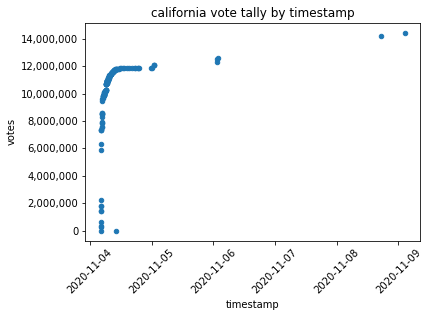

<Figure size 1800x288 with 0 Axes>

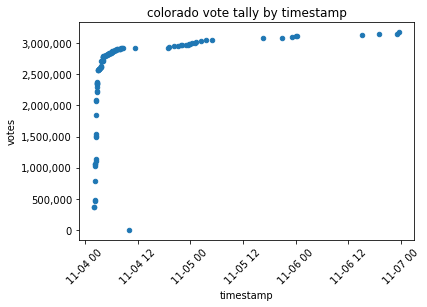

<Figure size 1800x288 with 0 Axes>

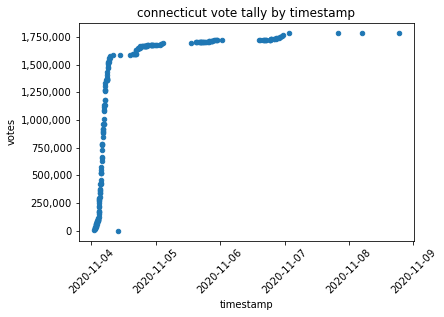

<Figure size 1800x288 with 0 Axes>

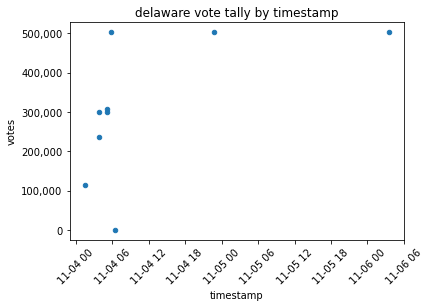

<Figure size 1800x288 with 0 Axes>

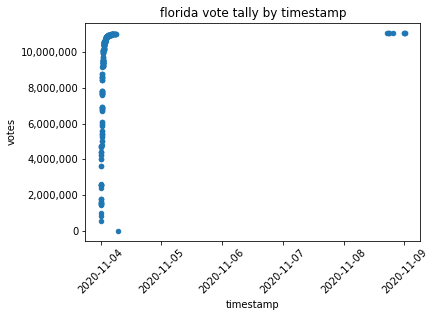

<Figure size 1800x288 with 0 Axes>

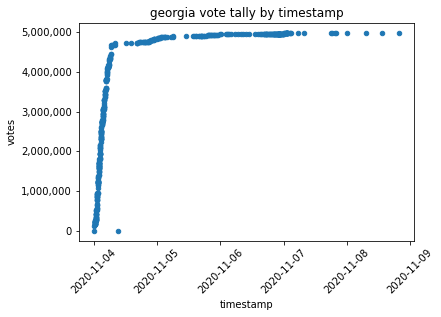

<Figure size 1800x288 with 0 Axes>

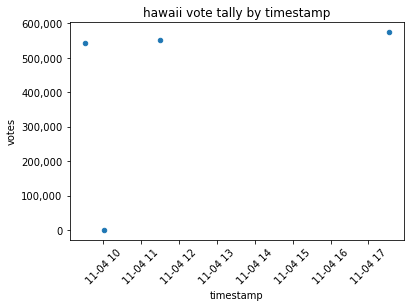

<Figure size 1800x288 with 0 Axes>

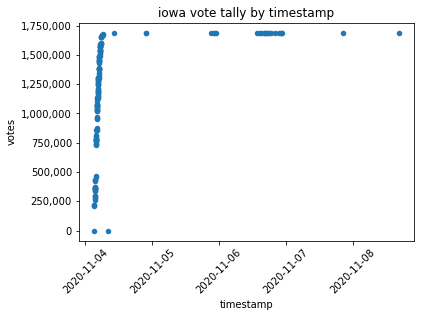

<Figure size 1800x288 with 0 Axes>

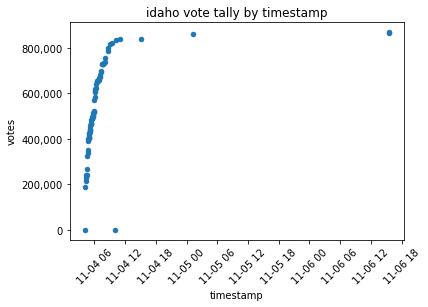

<Figure size 1800x288 with 0 Axes>

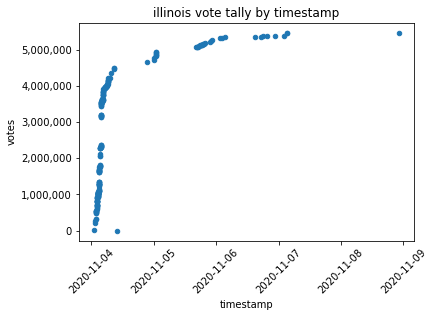

<Figure size 1800x288 with 0 Axes>

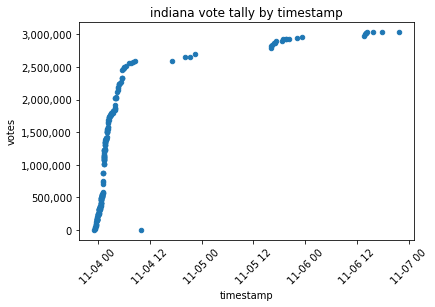

<Figure size 1800x288 with 0 Axes>

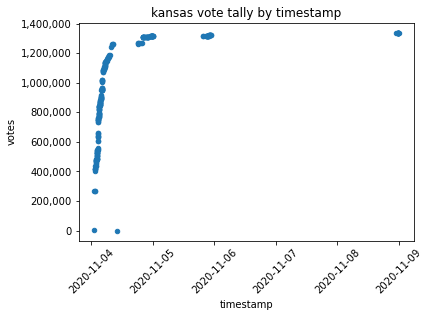

<Figure size 1800x288 with 0 Axes>

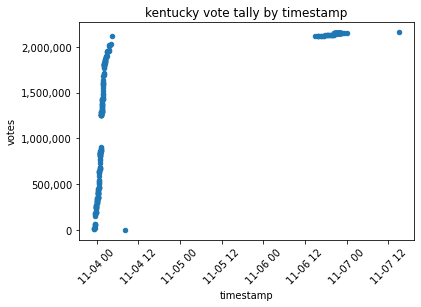

<Figure size 1800x288 with 0 Axes>

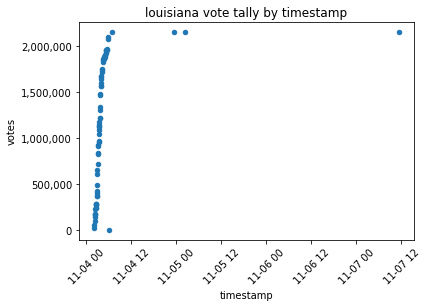

<Figure size 1800x288 with 0 Axes>

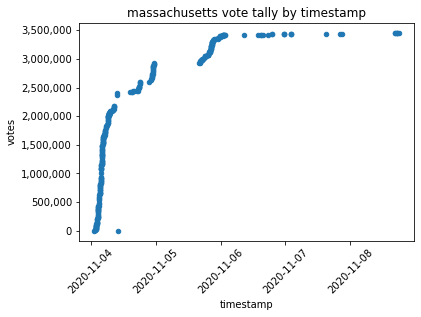

<Figure size 1800x288 with 0 Axes>

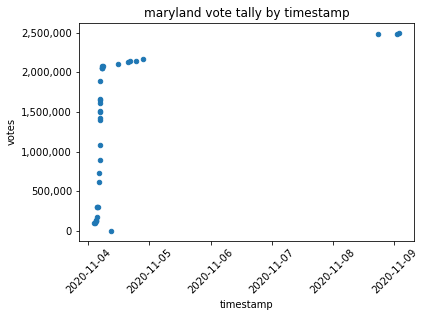

<Figure size 1800x288 with 0 Axes>

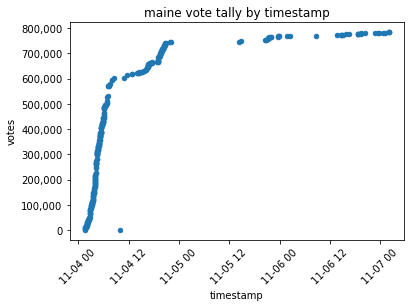

<Figure size 1800x288 with 0 Axes>

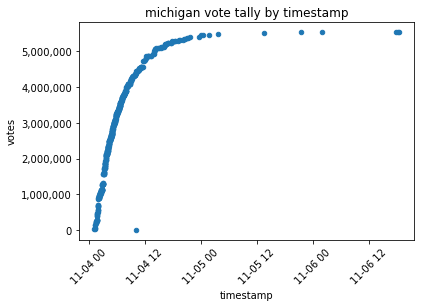

<Figure size 1800x288 with 0 Axes>

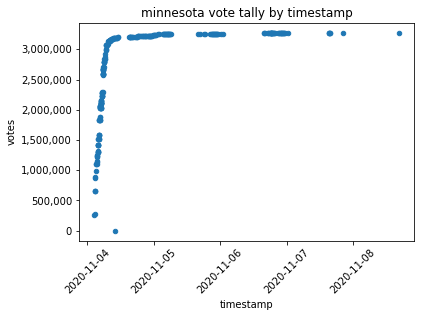

<Figure size 1800x288 with 0 Axes>

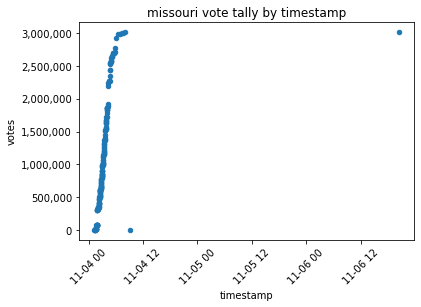

<Figure size 1800x288 with 0 Axes>

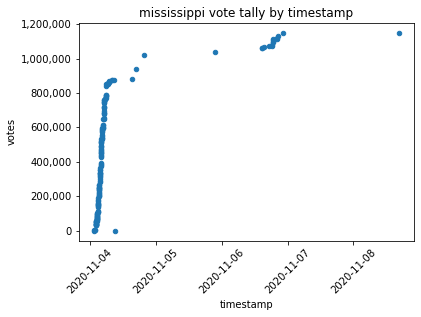

<Figure size 1800x288 with 0 Axes>

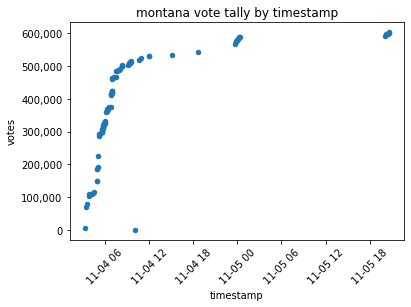

<Figure size 1800x288 with 0 Axes>

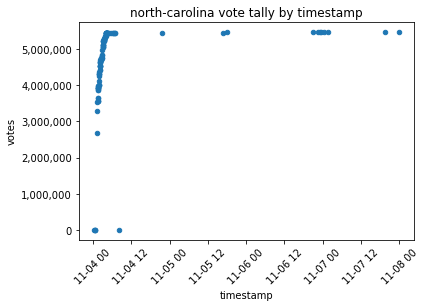

<Figure size 1800x288 with 0 Axes>

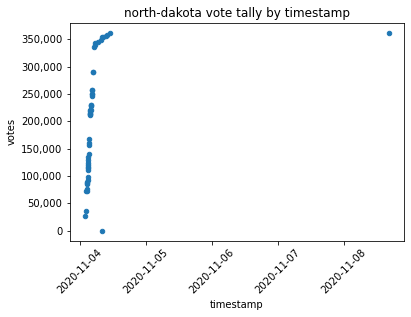

<Figure size 1800x288 with 0 Axes>

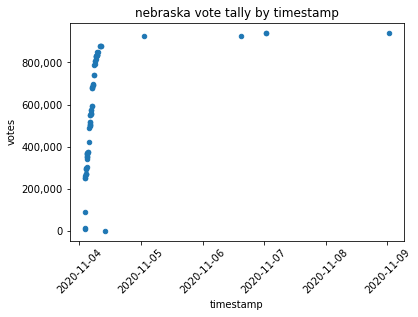

<Figure size 1800x288 with 0 Axes>

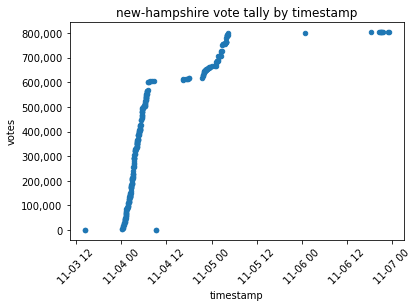

<Figure size 1800x288 with 0 Axes>

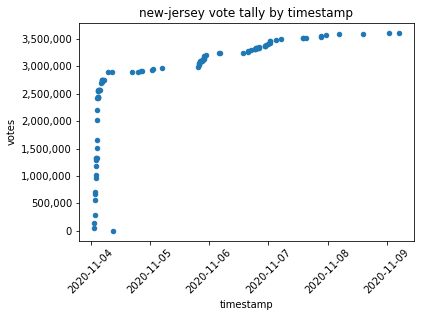

<Figure size 1800x288 with 0 Axes>

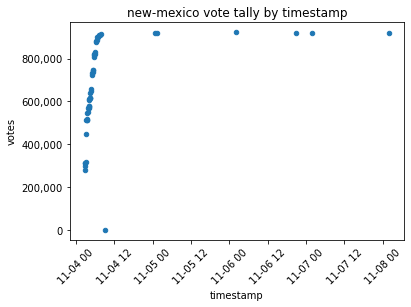

<Figure size 1800x288 with 0 Axes>

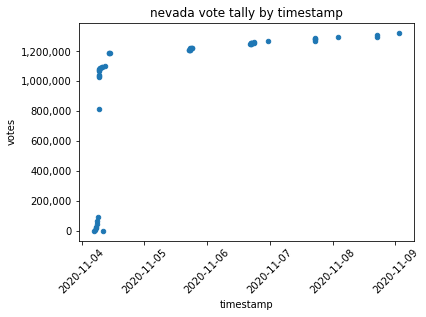

<Figure size 1800x288 with 0 Axes>

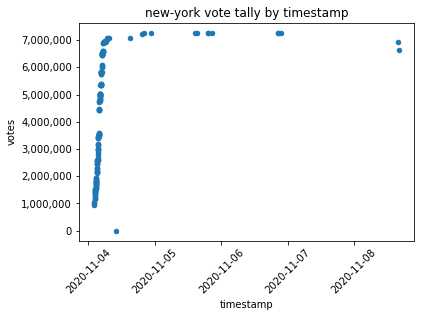

<Figure size 1800x288 with 0 Axes>

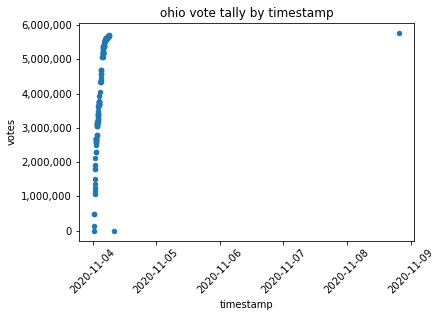

<Figure size 1800x288 with 0 Axes>

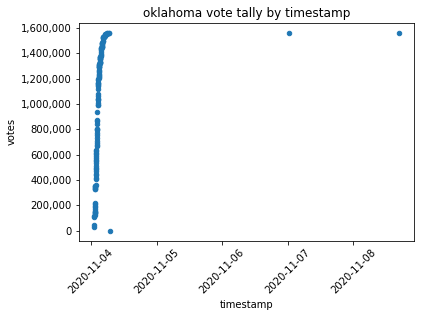

<Figure size 1800x288 with 0 Axes>

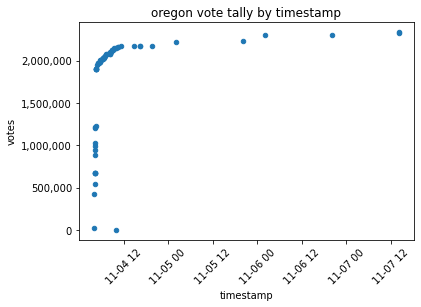

<Figure size 1800x288 with 0 Axes>

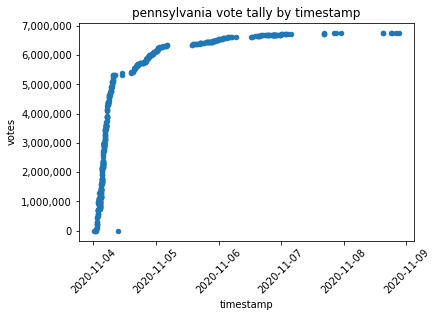

<Figure size 1800x288 with 0 Axes>

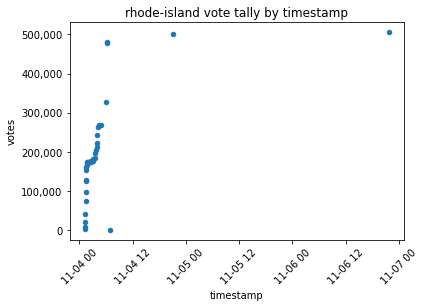

<Figure size 1800x288 with 0 Axes>

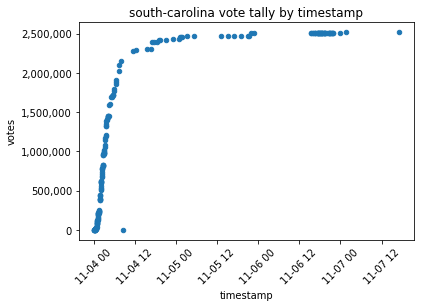

<Figure size 1800x288 with 0 Axes>

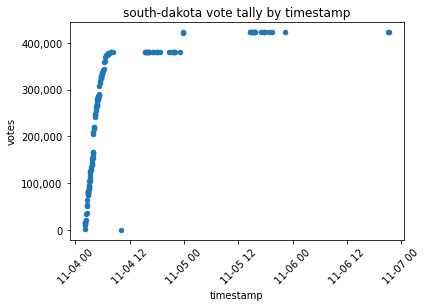

<Figure size 1800x288 with 0 Axes>

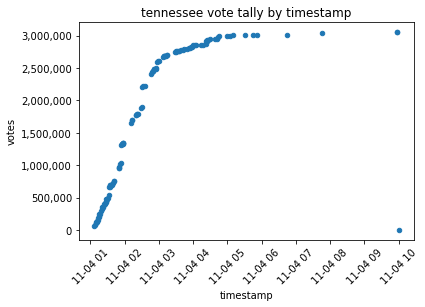

<Figure size 1800x288 with 0 Axes>

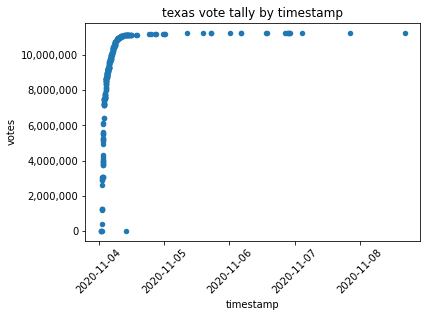

<Figure size 1800x288 with 0 Axes>

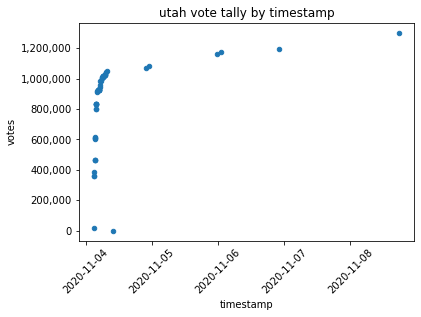

<Figure size 1800x288 with 0 Axes>

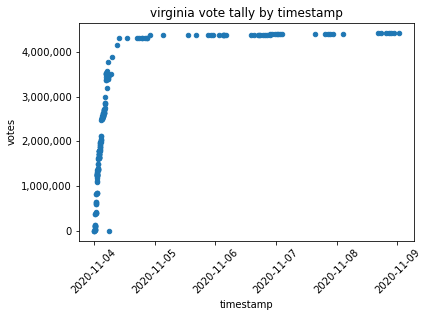

<Figure size 1800x288 with 0 Axes>

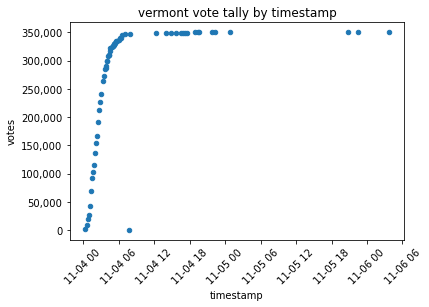

<Figure size 1800x288 with 0 Axes>

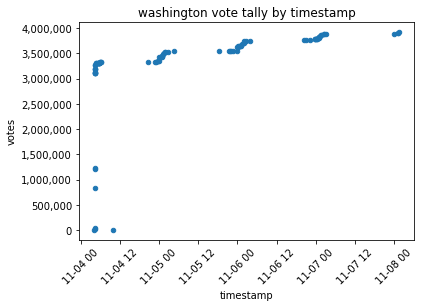

<Figure size 1800x288 with 0 Axes>

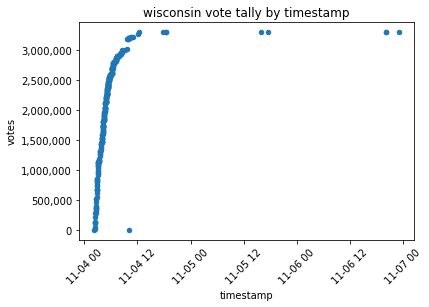

<Figure size 1800x288 with 0 Axes>

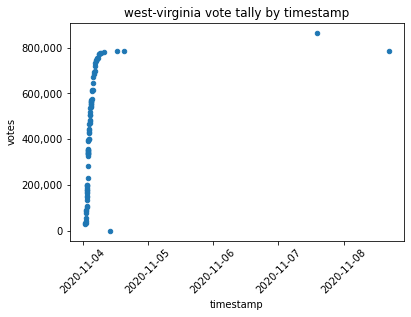

<Figure size 1800x288 with 0 Axes>

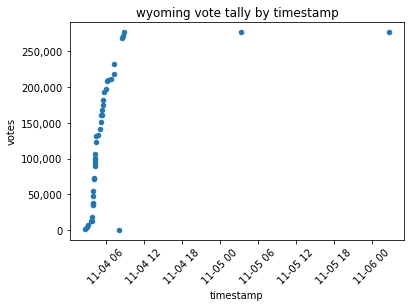

<Figure size 1800x288 with 0 Axes>

In [12]:
# Timestamps by state
for state in resultsByState: 
    ax = state[1].plot(x='timestamp', y='votes', kind='scatter', title=state[0]+' vote tally by timestamp')
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.xticks(rotation=45)
#     plt.figure(figsize=(25,4))
